In [1]:
import sys
sys.path.append('src')
sys.path.append('models')
sys.path.append('data')
from librerias import *
from utils import *
%load_ext autoreload
%autoreload 2

In [2]:
 %reload_ext autoreload

In [9]:
df=pd.read_csv('data\dataset_SCL.csv')
df.head()

C:\Users\jeortizs\AppData\Local\Temp\ipykernel_10096\2852217014.py:1: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('data\dataset_SCL.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


In [11]:
letters_in_col1 = df['Vlo-I'].str.contains('[a-zA-Z]', regex=True)
letters_in_col6 = df['Vlo-O'].str.contains('[a-zA-Z]', regex=True)
letters_in_either_col = letters_in_col1 | letters_in_col6
rows_with_letters = df[letters_in_either_col]
print(rows_with_letters)

                   Fecha-I  Vlo-I Ori-I Des-I Emp-I              Fecha-O  \
13906  2017-03-30 10:30:00     71  SCEL  SCIE   SKU  2017-03-30 10:50:00   
13907  2017-03-22 11:00:00   1071  SCEL  SCIE   SKU  2017-03-22 11:00:00   
17055  2017-03-22 10:00:00    201  SCEL  SCIE   LXP  2017-03-22 11:50:00   
19207  2017-04-25 09:00:00     71  SCEL  SCIE   SKU  2017-04-25 09:29:00   
22167  2017-04-06 21:10:00     43  SCEL  SCIE   LAW  2017-04-06 21:24:00   
22232  2017-05-13 21:50:00   989P  SCEL  SUMU   AAL  2017-05-13 21:52:00   
22301  2017-05-26 09:40:00    401  SCEL  LFPG   AFR  2017-05-26 10:03:00   
22302  2017-05-28 09:40:00    401  SCEL  LFPG   AFR  2017-05-28 09:43:00   
24304  2017-05-11 10:00:00    802  SCEL  SPJC   SKU  2017-05-11 10:36:00   
27246  2017-05-15 12:15:00    114  SCEL  SCAT   LAN  2017-05-15 13:10:00   
27247  2017-05-25 13:15:00    622  SCEL  MMMX   LAN  2017-05-25 13:23:00   
27464  2017-06-16 20:30:00   940P  SCEL  KDFW   AAL  2017-06-16 20:50:00   
32196  2017-

Se encuentra que en las columnas 1 y 6 las letras hacen parte de la identificación alfanumerica de los vuelos, inicialmente manejaremos las columnas como cadena, pero al momento de realizar el entrenamiento extraeremos la parte numerica, y utilizaremos un label para la parte alfabetica.

In [3]:
df=pd.read_csv('data\dataset_SCL.csv', dtype={'Vlo-I': 'str', 'Vlo-O': 'str'})
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [4]:
df['Vlo-I_numeric'] = df['Vlo-I'].apply(extract_numeric_part)
df['Vlo-O_numeric'] = df['Vlo-O'].apply(extract_numeric_part)
df['Vlo-I_alphabetic'] = df['Vlo-I'].apply(extract_alphabetic_part)
df['Vlo-O_alphabetic'] = df['Vlo-O'].apply(extract_alphabetic_part)

In [5]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Vlo-I_numeric,Vlo-O_numeric,Vlo-I_alphabetic,Vlo-O_alphabetic
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,...,2017,Domingo,I,American Airlines,Santiago,Miami,226,226.0,None,None
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,...,2017,Lunes,I,American Airlines,Santiago,Miami,226,226.0,None,None
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,...,2017,Martes,I,American Airlines,Santiago,Miami,226,226.0,None,None
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,...,2017,Miercoles,I,American Airlines,Santiago,Miami,226,226.0,None,None
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,...,2017,Jueves,I,American Airlines,Santiago,Miami,226,226.0,None,None


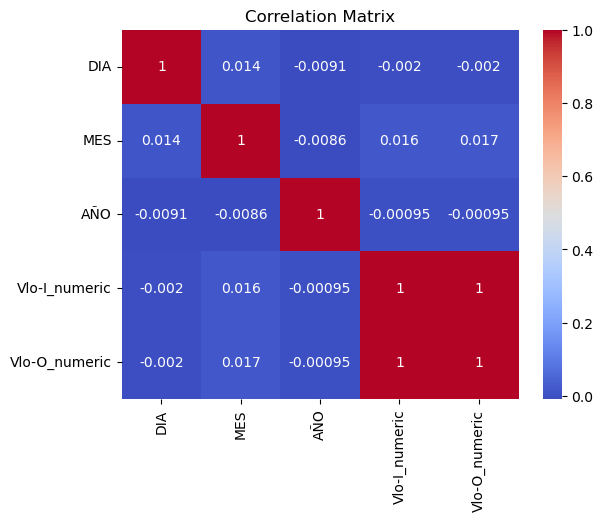

In [6]:
plot_correlation_matrix(df)

In [7]:
df.isna().sum()

Fecha-I                 0
Vlo-I                   0
Ori-I                   0
Des-I                   0
Emp-I                   0
Fecha-O                 0
Vlo-O                   1
Ori-O                   0
Des-O                   0
Emp-O                   0
DIA                     0
MES                     0
AÑO                     0
DIANOM                  0
TIPOVUELO               0
OPERA                   0
SIGLAORI                0
SIGLADES                0
Vlo-I_numeric           0
Vlo-O_numeric           1
Vlo-I_alphabetic    68201
Vlo-O_alphabetic    68189
dtype: int64

In [8]:
date_columns = ["Fecha-I", "Fecha-O"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

In [9]:
row_missing_value = df[df['Vlo-O'].isna()]
row_missing_value

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Vlo-I_numeric,Vlo-O_numeric,Vlo-I_alphabetic,Vlo-O_alphabetic
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,NaN,None,0


In [10]:
df[(df['Fecha-I'].dt.hour == row_missing_value['Fecha-I'].dt.hour.iloc[0]) 
    & (df['Emp-I'] == row_missing_value['Emp-I'].iloc[0]) 
    & (df['Ori-O'] == row_missing_value['Ori-O'].iloc[0]) 
    & (df['Des-O'] == row_missing_value['Des-O'].iloc[0]) 
    & (df['DIANOM'] == row_missing_value['DIANOM'].iloc[0]) 
    & ~(df['Vlo-O'].isna())]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,...,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Vlo-I_numeric,Vlo-O_numeric,Vlo-I_alphabetic,Vlo-O_alphabetic
6063,2017-01-12 11:00:00,200,SCEL,SPJC,LAW,2017-01-12 11:00:00,200,SCEL,SPJC,48O,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,200.0,None,None
6074,2017-01-26 11:00:00,200,SCEL,SPJC,LAW,2017-01-26 11:06:00,200,SCEL,SPJC,JMR,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,200.0,None,None
11615,2017-02-02 11:00:00,200,SCEL,SPJC,LAW,2017-02-02 10:54:00,200,SCEL,SPJC,JMR,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,200.0,None,None
11625,2017-02-16 11:00:00,200,SCEL,SPJC,LAW,2017-02-16 10:55:00,200,SCEL,SPJC,JMR,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,200.0,None,None
11631,2017-02-23 11:00:00,200,SCEL,SPJC,LAW,2017-02-23 10:59:00,200,SCEL,SPJC,JMR,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,200.0,None,None
17063,2017-03-02 11:00:00,200,SCEL,SPJC,LAW,2017-03-02 11:09:00,200,SCEL,SPJC,JMR,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,200.0,None,None
17069,2017-03-09 11:00:00,200,SCEL,SPJC,LAW,2017-03-09 11:08:00,200,SCEL,SPJC,JMR,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,200.0,None,None
17075,2017-03-16 11:00:00,200,SCEL,SPJC,LAW,2017-03-16 11:07:00,200,SCEL,SPJC,JMR,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,200.0,None,None
17081,2017-03-23 11:00:00,200,SCEL,SPJC,LAW,2017-03-23 11:11:00,200,SCEL,SPJC,JMR,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,200.0,None,None
17085,2017-03-30 11:00:00,200,SCEL,SPJC,LAW,2017-03-30 10:57:00,200,SCEL,SPJC,JMR,...,2017,Jueves,I,Latin American Wings,Santiago,Lima,200,200.0,None,None


In [11]:
row_missing_value.index[0]

6068

In [12]:
df['Vlo-O'].loc[row_missing_value.index[0]]=200
df['Vlo-O_numeric'].loc[row_missing_value.index[0]]=200
df.isna().sum()

C:\Users\jeortizs\AppData\Local\Temp\ipykernel_6204\1818843141.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vlo-O'].loc[row_missing_value.index[0]]=200
C:\Users\jeortizs\AppData\Local\Temp\ipykernel_6204\1818843141.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vlo-O_numeric'].loc[row_missing_value.index[0]]=200


Fecha-I                 0
Vlo-I                   0
Ori-I                   0
Des-I                   0
Emp-I                   0
Fecha-O                 0
Vlo-O                   0
Ori-O                   0
Des-O                   0
Emp-O                   0
DIA                     0
MES                     0
AÑO                     0
DIANOM                  0
TIPOVUELO               0
OPERA                   0
SIGLAORI                0
SIGLADES                0
Vlo-I_numeric           0
Vlo-O_numeric           0
Vlo-I_alphabetic    68201
Vlo-O_alphabetic    68189
dtype: int64

In [96]:
plot_flight_analysis(df)

Utilizamoss estos graficos para responder a la pregunta #1 del challenge, donde queremos hacer una exploración visual de la distribución de los datos que nos permitan ver, tipos de vuelos, frecuencias, estacionalidad, etc. 